# Mass Profile

An extension of Homework 5.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Mass-profiles-by-particle-type" data-toc-modified-id="Mass-profiles-by-particle-type-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mass profiles by particle type</a></span></li><li><span><a href="#Hernquist-profiles" data-toc-modified-id="Hernquist-profiles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hernquist profiles</a></span></li><li><span><a href="#Rotation-curves" data-toc-modified-id="Rotation-curves-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rotation curves</a></span></li></ul></div>

## Setup

In [1]:
# scientific package imports
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams

import astropy.units as u
from astropy.constants import G

# import my own classes
from galaxy.galaxies import Galaxies
from galaxy.centerofmass import CenterOfMass
from galaxy.massprofile import MassProfile
from galaxy.plots import Plots

Get the set of 3 galaxies:

In [2]:
snap = 0
g = Galaxies(snaps=snap, usesql=True)

Get mass profile objects and some radii to plot:

In [3]:
names = g.filenames
mass_profiles = [(gname, MassProfile(g.galaxies[gname])) for gname in names]

radii = np.linspace(0.1, 30) * u.kpc
t = g.time.value / 1000

## Mass profiles by particle type

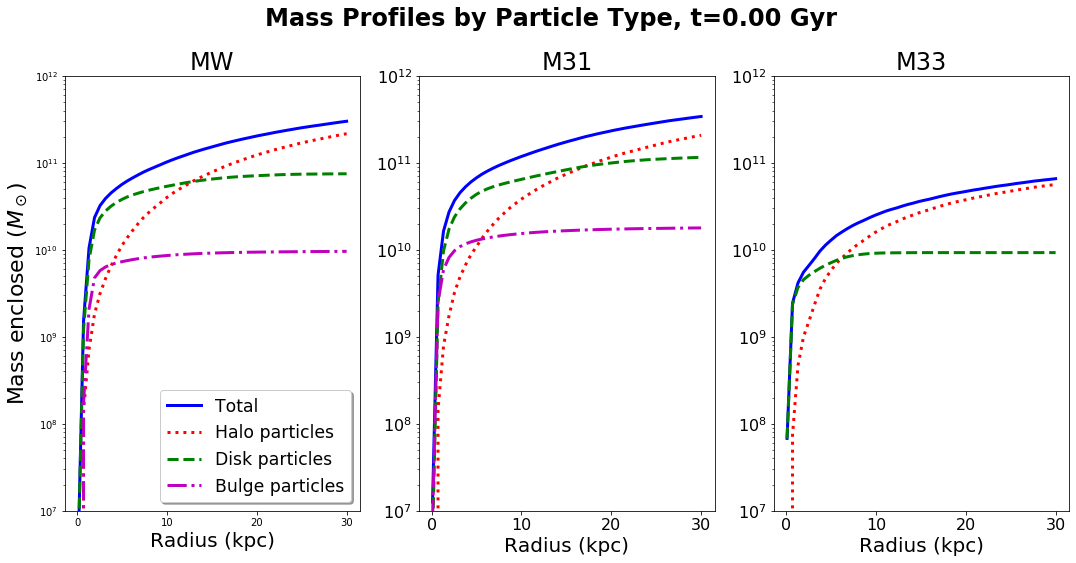

In [4]:
p = Plots()
p.mass_profiles(radii, mass_profiles, t)

## Hernquist profiles

Get `scipy.optimize` to do a non-linear least squares fit to find the a values:

In [5]:
# a dictionary to gather the results
fitted_a = {}

# loop over galaxies
for mass_prof in mass_profiles:
    gname, mp = mass_prof
    
    fitted_a[gname] = mp.fit_hernquist_a()

for k, v in fitted_a.items():
    print(f'{k:8s}: a = {v}')

MW_000  : a = 61.1 kpc
M31_000 : a = 61.1 kpc
M33_000 : a = 24.3 kpc


## Rotation curves

Plot the three galaxies, with all axes matching:

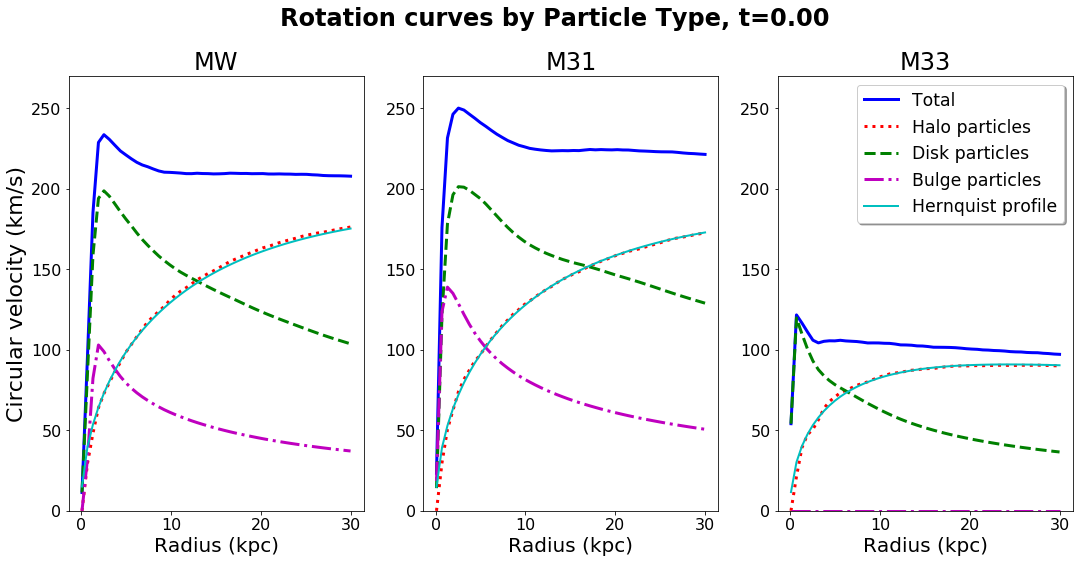

In [6]:
p.rotation_curves(radii, mass_profiles, fitted_a, t)

In [7]:
# assert len(names) == 3
# fig = plt.figure(figsize=(18,8))
# subplots = (131, 132, 133)

# for i in range(len(names)):
#     ax = plt.subplot(subplots[i])
#     gname, mp = mass_profiles[i]
    
#     # the a value is from scipy.optimize, above
#     a_opt = fitted_a[gname]
    
#     # add the curves
#     ax.plot(radii, mp.circular_velocity_total(radii), 'b-', lw=3, label='Total')
#     ax.plot(radii, mp.circular_velocity(radii, 1), 'r:', lw=3, label='Halo particles')
#     ax.plot(radii, mp.circular_velocity(radii, 2), 'g--', lw=3, label='Disk particles')
    
#     # M33 has no bulge, but include it just to get a legend
#     # The other subplots have no empty areas
#     ax.plot(radii, mp.circular_velocity(radii, 3), 'm-.', lw=3, label='Bulge particles')
    
#     # add the Hernquist profile, use our best-fit a 
#     ax.plot(radii, mp.circular_velocity_hernquist(radii, a_opt), 'c-', lw=2, 
#             label='Hernquist profile')

#     #adjust tick label font size
#     label_size = 16
#     rcParams['xtick.labelsize'] = label_size 
#     rcParams['ytick.labelsize'] = label_size

#     # Add labels
#     ax.set_xlabel('Radius (kpc)', fontsize=20)
#     if i == 0: # left subplot only
#         ax.set_ylabel(r'Circular velocity (km/s)', fontsize=22)
#     if i == 2: # right subplot only
#         ax.legend(fontsize='xx-large', shadow=True)
#     ax.set_title(gname[:-4], fontsize=24)

#     #set axis limits
#     ax.set_ylim(0, 270)

# fig.suptitle(f'Rotation curves by Particle Type', y=1.0, fontsize=24, weight='bold');

As expected, we can see that the baryonic particles give curves declining at large radius, where the dark matter halo dominates and keeps the total rotation curve fairly flat.

Fitting the Hernquist profile isn't perfect, but quite good.